Tensorflow and Keras Basics
==========

Tensorflow Basic 1
-------

In [0]:
import tensorflow as tf

In [4]:
# 그래프를 그려주기만 함
# 그래프 d에 대한 결괏값만 나옴
# 그래프를 다 그려놓고 실행한다는 단점이 있음
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.constant(5.0)
d = a * b + c
print(d)

Tensor("add:0", shape=(), dtype=float32)


In [5]:
# 그래프 실행
sess = tf.Session()
result = sess.run(d)
print(result)

17.0


Tensorflow Basic 2 
-----------

1. 데이터 수집
2. 모델 선택
3. loss function 정하기
4. optimizer 정하기
5. train 시키기
6. test 해보기

In [0]:
W = tf.Variable(tf.random_normal(shape=[1], name = 'w'))
b = tf.Variable(tf.random_normal(shape=[1], name = 'b'))
x = tf.placeholder(tf.float32)

pred = W * x + b

In [0]:
y = tf.placeholder(tf.float32)

loss = tf.reduce_mean(tf.square(pred - y)) # reduce_mean : 차원을 1차원으로 줄여 scalar로 만듦

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

train_step = optimizer.minimize(loss)

In [0]:
x_train = [1,2,3,4]
y_train = [3,5,7,9]

In [0]:
sess = tf.Session()
result = sess.run(tf.global_variables_initializer()) # W,b에 대해서 초기화, Variable만 초기화

In [0]:
for i in range(1000):
  sess.run(train_step, feed_dict={x:x_train, y:y_train}) # placeholder x에 x_train을 넣어주겠다

In [12]:
x_test = [3,5,5,6]

print(sess.run(pred, feed_dict={x:x_test}))

[ 7.000787 11.027032 11.027032 13.040155]


Keras Basic
----

1. 데이터 수집 및 확인
2. 모델 선택
3. loss function, metrics, optimizer 정하기
4. data preprocessing(normalization, category to vector)
5. train 시키기
6. test 해보기

In [13]:
import keras

Using TensorFlow backend.


In [14]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) [5 0 4 ... 5 6 8]


5


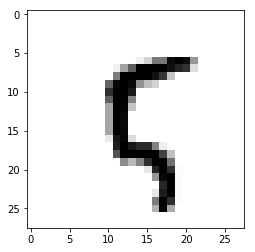

In [15]:
import matplotlib.pyplot as plt
digit = train_images[100]
print(train_labels[100])
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [16]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(128, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

network.summary()

W0904 05:18:21.446201 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 05:18:21.457021 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 05:18:21.464026 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 어떻게 훈련할지 정해주기
network.compile(optimizer = 'rmsprop', # weight를 어떤 식으로 update를 할 지 정해주기
               loss = 'categorical_crossentropy', # 정답 label만 1 배정 ==> 정답의 확률을 높히고 오답의 확률을 떨어뜨리기 위해...
                # 문제에 맞는 activation function과 loss function을 세울 줄 알아야한다.
                # activation으로 softmax를 했는데 loss로 mean squared error를 하면 안 된다!!!!!
               metrics = ['accuracy'])

W0904 05:18:28.232683 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 05:18:28.265941 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # 정규화 --> 값이 너무 커진다... 최댓값으로 나눠서 훈련하기 쉽게 만들어 줌(색상값)

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical # 레이블을 벡터로 바꿔주는 방법

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128) # epoch : 60000만 장을 학습시키는 것이 한 번의 epoch
                                                                      # batch_size : 한번에 128장을 학습시키겠다. --> 메모리의 한계 때문에...
                                                                      # batch_size가 너무 크면 중간으로 수렴하게 됨 -> batch size도 잘 조정해줘야 함

W0904 05:18:41.940591 140271916771200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 05:18:42.012301 140271916771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.3352 - acc: 0.9081
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1619 - acc: 0.9537
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1156 - acc: 0.9662
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0904 - acc: 0.9738
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0737 - acc: 0.9786


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [22]:
print('test_acc :', test_acc)

test_acc : 0.9738
